In [ ]:
import pandas as pd
import plotly.express as px


## 1. Data Profiling:

In [ ]:
df_traffic =pd.read_csv('traffic_index.csv')

In [ ]:
df_traffic.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,datetime,year,date,time
119193,Riyadh,2022-12-16 12:46:30,5,33,115.0,13.7,6.0,NaN,NaN,2022-12-16 12:46:30,2022,2022-12-16,12:46:30
119194,Riyadh,2022-12-16 13:46:30,6,57,197.6,39.4,11.0,NaN,NaN,2022-12-16 13:46:30,2022,2022-12-16,13:46:30
119195,Riyadh,2022-12-16 14:46:30,10,78,311.7,72.7,17.0,NaN,NaN,2022-12-16 14:46:30,2022,2022-12-16,14:46:30
119196,Riyadh,2022-12-16 15:46:30,13,127,508.1,105.1,17.0,NaN,NaN,2022-12-16 15:46:30,2022,2022-12-16,15:46:30
119197,Riyadh,2022-12-16 16:46:00,21,184,838.1,153.4,26.0,NaN,NaN,2022-12-16 16:46:00,2022,2022-12-16,16:46:00


In [ ]:
df_traffic.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,datetime,year
count,14817.000000,14817.000000,14817.000000,14817.000000,14813.000000,14044.000000,14044.000000,14817,14817.000000
mean,23.921577,156.637646,663.236148,145.755126,23.873084,73.266313,74.841097,2023-10-25 18:46:52.821488896,2023.370183
min,0.000000,0.000000,0.000000,0.000000,0.000000,52.683439,50.283013,2022-12-16 12:46:30,2022.000000
25%,7.000000,33.000000,121.200000,20.200000,7.000000,66.005547,62.883274,2023-05-21 13:01:30,2023.000000
50%,23.000000,121.000000,467.600000,114.200000,23.000000,73.644456,74.237055,2023-10-22 20:31:30,2023.000000
75%,36.000000,241.000000,975.300000,224.800000,36.000000,79.576556,84.523306,2024-03-30 16:46:30,2024.000000
max,107.000000,997.000000,6169.500000,940.600000,107.000000,97.701809,139.731152,2024-09-06 07:01:30,2024.000000
std,18.463065,140.744301,672.736445,137.186322,18.341569,9.644711,14.088333,NaN,0.532334


In [ ]:
df_traffic.shape

(134010, 9)

In [ ]:
df_traffic['datetime'] = pd.to_datetime(df_traffic['Datetime'])

# Extract date and time components
df_traffic['year'] = df_traffic['datetime'].dt.year
df_traffic['date'] = df_traffic['datetime'].dt.date
df_traffic['time'] = df_traffic['datetime'].dt.time

In [ ]:
#df_traffic.drop('Datetime', axis=1, inplace=True)

In [ ]:
#Filter Riyadh city
df_traffic = df_traffic[(df_traffic['City'] == 'Riyadh')]

In [ ]:
df_traffic.head(2)

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,datetime,year,date,time
119193,Riyadh,2022-12-16 12:46:30,5,33,115.0,13.7,6.0,NaN,NaN,2022-12-16 12:46:30,2022,2022-12-16,12:46:30
119194,Riyadh,2022-12-16 13:46:30,6,57,197.6,39.4,11.0,NaN,NaN,2022-12-16 13:46:30,2022,2022-12-16,13:46:30


In [ ]:
df_traffic.shape

(14817, 13)

### Data Quality Checks

#### 1. Reliability:

Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# the data is collected from eng.Majed ---- (Scrabing from tomtom website)

#### 2. Timeliness:

Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [ ]:
# We extracted data for the years 2022, 2023, and 2024

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.

In [ ]:
# -

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

In [ ]:
# the data is relevant to our objective analysis and we don't need to delete any columns.

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.

In [ ]:
df_traffic.duplicated().sum()

0

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

In [ ]:
df_traffic.isnull().sum()

City                     0
Datetime                 0
TrafficIndexLive         0
JamsCount                0
JamsDelay                0
JamsLength               0
TrafficIndexWeekAgo      4
TravelTimeHistoric     773
TravelTimeLive         773
datetime                 0
year                     0
date                     0
time                     0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.
**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [ ]:
df_traffic.dtypes

City                           object
Datetime                       object
TrafficIndexLive                int64
JamsCount                       int64
JamsDelay                     float64
JamsLength                    float64
TrafficIndexWeekAgo           float64
TravelTimeHistoric            float64
TravelTimeLive                float64
datetime               datetime64[ns]
year                            int32
date                           object
time                           object
dtype: object

### 2024 School days

In [ ]:
df_2024 = df_traffic[(df_traffic['year'] == 2024)]

In [ ]:
df_2024.shape

(5857, 13)

In [ ]:
df_2024['date'] = df_2024['date'].astype('datetime64[ns]')

/var/folders/m0/d7nkwwgn3gx97f2f9lfwlfd40000gn/T/ipykernel_91820/1826093194.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Show from first day School at 2023 wich is 13/8/2023
cutoff_date = pd.to_datetime('2023-08-13')
df_2024 = df_2024[df_2024['date'] >= cutoff_date]

In [ ]:
#Term1 -> 1-holiday (National day from Thursday 21/9 to Sunday 24/9/2023)
start_date = '2023-09-21'
end_date = '2023-09-24'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#Term1 -> 2-holiday (Long weekend from  Thursday 2/11 to Saturday 4/11/2023)
start_date = '2023-11-02'
end_date = '2023-11-04'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#Term1 -> 3-holiday (The beginning of term-1 vacation from  Thursday 16/11 to Saturday 25/11/2023)
start_date = '2023-11-16'
end_date = '2023-11-25'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#Term2 -> 1-holiday (long weekend from  Thursday 14/12 to Sunday 17/12/2023)
start_date = '2023-12-14'
end_date = '2023-12-17'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#Term2 -> 2-holiday (Mid-term break from Thursday 4/1/2024 to Saturday 13/1/2024)
start_date = '2024-01-04'
end_date = '2024-01-13'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#Term2 -> 3-holiday (long weekend from Thursday 25/1/2024 to Sunday 28/1/2024)
start_date = '2024-01-25'
end_date = '2024-01-28'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#Term2 -> 4-holiday (Foundation Day(التأسيس) and the beginning of term-2 vacation from Thursday 22/2/2024 to Saturday 2/3/2024)
start_date = '2024-02-22'
end_date = '2024-03-02'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#Term3 -> 1-holiday (Eid al-Fitr from Thursday 28/3/2024 to Sunday 14/4/2024)
start_date = '2024-02-28'
end_date = '2024-04-14'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#Term3 -> 1-holiday (long weekend Thursday 2/5/2024 to Saturday 4/4/2024)
start_date = '2024-05-02'
end_date = '2024-05-04'
df_2024 = df_2024[~((df_2024['date'] >= start_date) & (df_2024['date'] <= end_date))]

In [ ]:
#drop all summer holiday from Tuesday 11/6/2024
cutoff_date = pd.to_datetime('2024-06-11')
df_2024 = df_2024[df_2024['date'] < cutoff_date]

In [ ]:
df_2024.to_csv('School24_without_holiedays.csv', index=False)

In [ ]:
df_2024.shape

(2098, 13)

#### 2024 School days morning peak times (from 6:00 to 10:00 am)

In [ ]:
start_time = pd.to_datetime('06:00:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('10:59:00', format='%H:%M:%S').time()
df_2024_am = df_2024[(df_2024['time'] >= start_time) & (df_2024['time'] <= end_time)]

In [ ]:
df_2024_am.shape

(437, 13)

In [ ]:
df_2024_am.shape

(437, 13)

In [ ]:
df_2024_am.to_csv('School24_without_holiedays_am.csv')

#### 2024 School days eveining peak times (from 1:00 to 7:00 pm)

In [ ]:
start_time = pd.to_datetime('13:00:00', format='%H:%M:%S').time()
end_time = pd.to_datetime('21:59:00', format='%H:%M:%S').time()
df_2024_pm = df_2024[(df_2024['time'] >= start_time) & (df_2024['time'] <= end_time)]

In [ ]:
df_2024_pm.shape

(783, 13)

In [ ]:
df_2024_pm.to_csv('School24_without_holiedays_pm.csv')

### 2023 School days

In [ ]:
df_2023 = df_traffic[(df_traffic['year'] == 2023)]

In [ ]:
#df_2023.info()

In [ ]:
df_2023.dtypes

City                           object
Datetime                       object
TrafficIndexLive                int64
JamsCount                       int64
JamsDelay                     float64
JamsLength                    float64
TrafficIndexWeekAgo           float64
TravelTimeHistoric            float64
TravelTimeLive                float64
datetime               datetime64[ns]
year                            int32
date                           object
time                           object
dtype: object

In [ ]:
df_2023['date'] = df_2023['date'].astype('datetime64[ns]')

/var/folders/m0/d7nkwwgn3gx97f2f9lfwlfd40000gn/T/ipykernel_91820/41246734.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#drop all vacations
vacation_periods = [
    ('2023-01-13', '2023-01-15'),
    ('2023-02-22', '2023-02-25'),
    ('2023-03-02', '2023-03-12'),
    ('2023-04-13', '2023-04-26'),
    ('2023-05-26', '2023-05-28'),
    ('2023-06-22', '2023-08-20'),
    ('2023-11-02', '2023-11-04'),
    ('2023-11-16', '2023-11-26'),
    ('2023-12-15', '2023-12-17')
]

# Create a boolean mask for the vacation periods
mask = pd.Series([False] * len(df_2023), index=df_2023.index)

for start_date, end_date in vacation_periods:
    mask |= ((df_2023['date'] >= start_date) & (df_2023['date'] <= end_date))

# Apply the mask to keep only rows within any of the vacation periods
df_2023 = df_2023[~mask]

In [ ]:
df_2023.to_csv('School23_without_holiedays.csv', index=False)

#### 2023 School days morning peak times (from 6:00 to 10:00 am)

In [ ]:
df_2023['time'] = df_2023['time'].astype('str')

In [ ]:
df_2023_am = df_2023[(df_2023['time'] >= '06:00:00') & (df_2023['time'] <= '10:59:00')]

In [ ]:
df_2023_am.to_csv('School23_without_holiedays_am.csv')

In [ ]:
df_2023_am.shape

(1239, 13)

#### 2023 School days eveining peak times (from 2:00 to 8:00 am)

In [ ]:
df_2023_pm = df_2023[(df_2023['time'] >= '13:00:00') & (df_2023['time'] <= '21:59:00')]

In [ ]:
df_2023_pm.to_csv('School23_without_holiedays_pm.csv')

In [ ]:
df_2023_pm.shape

(2236, 13)

#### 2023 School days eveining peak times (from 2:00 to 8:00 am)

### 2024 Holiday days

In [ ]:
df_2024_all_h = df_traffic[(df_traffic['year'] == 2024)]

In [ ]:
#Change date type to datetime
df_2024_all_h['date'] = df_2024_all_h['date'].astype('datetime64[ns]')

/var/folders/m0/d7nkwwgn3gx97f2f9lfwlfd40000gn/T/ipykernel_91820/1041778992.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_2024_all_h.shape

(5857, 13)

In [ ]:
df_2024_all_h.dtypes

City                           object
Datetime                       object
TrafficIndexLive                int64
JamsCount                       int64
JamsDelay                     float64
JamsLength                    float64
TrafficIndexWeekAgo           float64
TravelTimeHistoric            float64
TravelTimeLive                float64
datetime               datetime64[ns]
year                            int32
date                   datetime64[ns]
time                           object
dtype: object

In [ ]:
vacation_periods = [
  ('2024-01-04', '2024-01-13'),  # إجازة منتصف الفصل الدراسي الثاني
    ('2024-02-22', '2024-03-02'),  # إجازة يوم التأسيس و إجازة الفصل الدراسي الثاني
    ('2024-03-28', '2024-04-14'),  # إجازة عيد الفطر
    ('2024-06-10', '2024-08-17') #Summer holiday
]

# Create a boolean mask for the vacation periods
mask = pd.Series([False] * len(df_2024_all_h), index=df_2024_all_h.index)

for start_date, end_date in vacation_periods:
    mask |= ((df_2024_all_h['date'] >= start_date) & (df_2024_all_h['date'] <= end_date))

# Apply the mask to keep only rows within any of the vacation periods
df_2024_all_h = df_2024_all_h[mask]

In [ ]:
df_2024_all_h.shape

(2551, 13)

In [ ]:
df_2024_all_h['time'] = df_2024_all_h['time'].astype('str')

In [ ]:
df_2024_all_h_am = df_2024_all_hh[(df_2024_all_h['time'] >= '06:00:00') & (df_2024_all_h['time'] <= '10:59:00')]

In [ ]:
df_2024_all_h_am.to_csv('df_2024_all_h_am.csv')

In [ ]:
df_2024_all_h_am.shape

(531, 13)

In [ ]:
df_2024_all_h_pm = df_2024_all_hh[(df_2024_all_h['time'] >= '13:00:00') & (df_2024_all_h['time'] <= '21:59:00')]

In [ ]:
df_2024_all_h_pm.to_csv('df_2024_all_h_pm.csv')

In [ ]:
df_2024_all_h_pm.shape

(955, 13)

### 2023 Holiday days

In [ ]:
df_2023_all_h = df_traffic[(df_traffic['year'] == 2023)]

In [ ]:
df_2023_all_h['date'] = df_2023_all_h['date'].astype('datetime64[ns]')

/var/folders/m0/d7nkwwgn3gx97f2f9lfwlfd40000gn/T/ipykernel_91820/598688451.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
vacation_periods = [
    ('2023-01-13', '2023-01-15'),
    ('2023-02-22', '2023-02-25'),
    ('2023-03-02', '2023-03-12'),
    ('2023-04-13', '2023-04-26'),
    ('2023-05-26', '2023-05-28'),
    ('2023-06-22', '2023-08-20'),
    ('2023-11-02', '2023-11-04'),
    ('2023-11-16', '2023-11-26'),
    ('2023-12-15', '2023-12-17')
]

# Create a boolean mask for the vacation periods
mask = pd.Series([False] * len(df_2023_all_h), index=df_2023_all_h.index)

for start_date, end_date in vacation_periods:
    mask |= ((df_2023_all_h['date'] >= start_date) & (df_2023_all_h['date'] <= end_date))

# Apply the mask to keep only rows within any of the vacation periods
df_2023_all_h = df_2023_all_h[mask]

In [ ]:
df_2023_all_h.shape

(2625, 13)

In [ ]:
#df_2023_copy.info()

In [ ]:
df_2023_all_h['time'] = df_2023_all_h['time'].astype('str')

In [ ]:
df_2023_all_h_am = df_2023_all_h[(df_2023_all_h['time'] >= '06:00:00') & (df_2023_all_h['time'] <= '10:59:00')]

In [ ]:
df_2023_all_h_am.to_csv('df_2023_all_h_am.csv')

In [ ]:
df_2023_all_h_pm = df_2023_all_h[(df_2023_all_h['time'] >= '13:00:00') & (df_2023_all_h['time'] <= '21:59:00')]

In [ ]:
df_2023_all_h_pm.to_csv('df_2023_all_h_pm.csv')

In [ ]:
df_2023_all_h_am.shape

(547, 13)

In [ ]:
df_2023_all_h_pm.shape

(982, 13)

### Concat 2023 vacation peak time (6:00 to 10:00)am  + (1:00 to 7:00)pm

In [ ]:
df_2023_holidays = pd.concat([df_2023_all_h_am, df_2023_all_h_pm], ignore_index=True)

In [ ]:
df_2023_holidays.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,datetime,year,date,time,TomTomEquivalent,Color
1524,Riyadh,2023-11-26 17:16:00,65,610,2938.2,546.7,63.0,92.044169,107.239465,2023-11-26 17:16:00,2023,2023-11-26,17:16:00,1.625000,red
1525,Riyadh,2023-11-26 18:01:00,63,511,2544.9,473.3,61.0,92.625963,106.377424,2023-11-26 18:01:00,2023,2023-11-26,18:01:00,1.605769,red
1526,Riyadh,2023-11-26 19:01:00,52,327,1556.4,297.4,53.0,86.513459,98.541107,2023-11-26 19:01:00,2023,2023-11-26,19:01:00,1.500000,orange
1527,Riyadh,2023-11-26 20:01:00,36,290,1019.2,226.2,37.0,81.418880,87.517016,2023-11-26 20:01:00,2023,2023-11-26,20:01:00,1.346154,orange
1528,Riyadh,2023-11-26 21:01:30,29,208,845.9,144.9,30.0,81.320300,82.914180,2023-11-26 21:01:30,2023,2023-11-26,21:01:30,1.278846,orange


In [ ]:
df_2023_holidays.shape

(1529, 13)

In [ ]:
df_2023_holidays['TomTomEquivalent'] = 1.0 + (df_2023_holidays['TrafficIndexLive'] * (2.0 - 1.0)) / 104

In [ ]:
def assign_color(value):
    if 0 <= value <= 1.0:
        return 'green'
    elif 1.1 <= value <= 1.5:
        return 'orange'
    elif value >= 1.6:
        return 'red'
    else:
        return 'unknown'

In [ ]:
df_2023_holidays['Color'] = df_2023_holidays['TomTomEquivalent'].apply(assign_color)

### Concat 2024 vacation peak time (6:00 to 10:00)am  + (1:00 to 7:00)pm

In [ ]:
df_2024_holidays = pd.concat([df_2024_all_h_am, df_2024_all_h_pm], ignore_index=True)

In [ ]:
df_2024_holidays.shape

(1486, 13)

### Concat 2023 + 2024 vacation peak time (6:00 to 10:00)am  + (1:00 to 7:00)pm

In [ ]:
df_23_24_holidays = pd.concat([df_2023_holidays, df_2024_holidays], ignore_index=True)

In [ ]:
df_23_24_holidays.shape

(3015, 13)

In [ ]:
df_23_24_holidays.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,datetime,year,date,time,hour,TomTomEquivalent,Color
0,Riyadh,2023-01-13 06:01:30,0,8,17.2,2.1,20.0,NaN,NaN,2023-01-13 06:01:30,2023,2023-01-13,06:01:30,6,1.0,green
1,Riyadh,2023-01-13 07:01:30,0,12,38.4,3.4,17.0,NaN,NaN,2023-01-13 07:01:30,2023,2023-01-13,07:01:30,7,1.0,green
2,Riyadh,2023-01-13 08:01:30,0,16,47.1,6.6,15.0,NaN,NaN,2023-01-13 08:01:30,2023,2023-01-13,08:01:30,8,1.0,green
3,Riyadh,2023-01-13 09:01:30,0,8,36.1,3.6,10.0,NaN,NaN,2023-01-13 09:01:30,2023,2023-01-13,09:01:30,9,1.0,green
4,Riyadh,2023-01-13 10:01:30,0,15,63.4,10.6,7.0,NaN,NaN,2023-01-13 10:01:30,2023,2023-01-13,10:01:30,10,1.0,green


In [ ]:
df_23_24_holidays['TomTomEquivalent'] = 1.0 + (df_23_24_holidays['TrafficIndexLive'] * (2.0 - 1.0)) / 104

In [ ]:
def assign_color(value):
    if 0 <= value <= 1.09999:
        return 'green'
    elif 1.1 <= value <= 1.5999:
        return 'orange'
    elif value >= 1.6:
        return 'red'
    else:
        return 'unknown'

In [ ]:
df_23_24_holidays['Color'] = df_23_24_holidays['TomTomEquivalent'].apply(assign_color)

In [ ]:
df_23_24_holidays.to_csv('df_23_24_holidays.csv')

In [ ]:
df_23_24_holidays.isnull().sum()

City                    0
Datetime                0
TrafficIndexLive        0
JamsCount               0
JamsDelay               0
JamsLength              0
TrafficIndexWeekAgo     1
TravelTimeHistoric     42
TravelTimeLive         42
datetime                0
year                    0
date                    0
time                    0
dtype: int64

In [ ]:
df_23_24_holidays.dtypes

City                           object
Datetime                       object
TrafficIndexLive                int64
JamsCount                       int64
JamsDelay                     float64
JamsLength                    float64
TrafficIndexWeekAgo           float64
TravelTimeHistoric            float64
TravelTimeLive                float64
datetime               datetime64[ns]
year                            int32
date                   datetime64[ns]
time                           object
dtype: object

### Averge TrafficIndexLive for each peak hours in holiday 2023 and 2024

In [ ]:
df_23_24_holidays['hour'] = df_23_24_holidays['datetime'].dt.hour

In [ ]:
df_23_24_holidays.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,datetime,year,date,time,hour
0,Riyadh,2023-01-13 06:01:30,0,8,17.2,2.1,20.0,NaN,NaN,2023-01-13 06:01:30,2023,2023-01-13,06:01:30,6
1,Riyadh,2023-01-13 07:01:30,0,12,38.4,3.4,17.0,NaN,NaN,2023-01-13 07:01:30,2023,2023-01-13,07:01:30,7
2,Riyadh,2023-01-13 08:01:30,0,16,47.1,6.6,15.0,NaN,NaN,2023-01-13 08:01:30,2023,2023-01-13,08:01:30,8
3,Riyadh,2023-01-13 09:01:30,0,8,36.1,3.6,10.0,NaN,NaN,2023-01-13 09:01:30,2023,2023-01-13,09:01:30,9
4,Riyadh,2023-01-13 10:01:30,0,15,63.4,10.6,7.0,NaN,NaN,2023-01-13 10:01:30,2023,2023-01-13,10:01:30,10


In [ ]:
df_filtered = df_23_24_holidays[df_23_24_holidays['datetime'].dt.hour == 9]

In [ ]:
df_filtered

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,datetime,year,date,time,hour
3,Riyadh,2023-01-13 09:01:30,0,8,36.1,3.6,10.0,NaN,NaN,2023-01-13 09:01:30,2023,2023-01-13,09:01:30,9
8,Riyadh,2023-01-14 09:46:30,8,37,103.4,20.9,7.0,NaN,NaN,2023-01-14 09:46:30,2023,2023-01-14,09:46:30,9
13,Riyadh,2023-01-15 09:46:30,34,106,441.1,187.6,46.0,NaN,NaN,2023-01-15 09:46:30,2023,2023-01-15,09:46:30,9
18,Riyadh,2023-02-22 09:31:30,3,16,44.2,8.1,27.0,68.725485,57.816000,2023-02-22 09:31:30,2023,2023-02-22,09:31:30,9
23,Riyadh,2023-02-23 09:46:30,6,31,110.4,18.3,24.0,68.097896,60.049003,2023-02-23 09:46:30,2023,2023-02-23,09:46:30,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,Riyadh,2024-08-13 09:16:30,31,148,572.7,175.3,29.0,78.729290,78.627488,2024-08-13 09:16:30,2024,2024-08-13,09:16:30,9
2043,Riyadh,2024-08-14 09:16:30,30,141,550.3,171.2,26.0,77.089236,78.265291,2024-08-14 09:16:30,2024,2024-08-14,09:16:30,9
2048,Riyadh,2024-08-15 09:46:30,28,146,558.2,167.5,23.0,73.392590,76.507774,2024-08-15 09:46:30,2024,2024-08-15,09:46:30,9
2053,Riyadh,2024-08-16 09:01:30,1,10,25.7,5.6,1.0,57.572076,56.781225,2024-08-16 09:01:30,2024,2024-08-16,09:01:30,9


In [ ]:
hourly_average_holiday = df_23_24_holidays.groupby('hour')['TrafficIndexLive'].mean().reset_index()

In [ ]:
hourly_average_holiday

,hour,TrafficIndexLive
0,6,2.709677
1,7,8.410138
2,8,12.246512
3,9,14.423256
4,10,14.098131
5,13,10.567442
6,14,13.734884
7,15,17.370370
8,16,28.562791
9,17,37.530233


In [ ]:
hourly_average_holiday.rename(columns={'TrafficIndexLive': 'Average_holiday_hours'}, inplace=True)

In [ ]:
hourly_average_holiday.rename(columns={'hour': 'holiday_hours'}, inplace=True)

### Concat 2024 School days peak time (6:00 to 10:00)am  + (1:00 to 9:00)pm

In [ ]:
df_2024_school = pd.concat([df_2024_am, df_2024_pm], ignore_index=True)

In [ ]:
df_2024_school.shape

(1220, 13)

### Concat 2023  School days peak time (6:00 to 10:00)am  + (1:00 to 9:00)pm

In [ ]:
df_2023_school = pd.concat([df_2023_am, df_2023_pm], ignore_index=True)

In [ ]:
df_2023_school.shape

(3475, 14)

### Concat 2023 + 2024 School days peak time (6:00 to 10:00)am  + (1:00 to 9:00)pm

In [ ]:
df_23_24_school = pd.concat([df_2023_school, df_2024_school], ignore_index=True)

In [ ]:
df_23_24_school.shape

(4695, 14)

## peak time colors

In [ ]:
df_23_24_school['TomTomEquivalent'] = 1.0 + (df_23_24_school['TrafficIndexLive'] * (2.0 - 1.0)) / 104

In [ ]:
def assign_color(value):
    if 0 <= value <= 1.09999:
        return 'green'
    elif 1.1 <= value <= 1.5999:
        return 'orange'
    elif value >= 1.6:
        return 'red'
    else:
        return 'unknown'

In [ ]:
df_23_24_school['Color'] = df_23_24_school['TomTomEquivalent'].apply(assign_color)

In [ ]:
df_23_24_school.to_csv('df_23_24_school.csv')

In [ ]:
df_23_24_school.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive,datetime,year,date,time,hour,TomTomEquivalent,Color
0,Riyadh,2023-01-01 06:46:30,25,136,538.6,173.7,25.0,NaN,NaN,2023-01-01 06:46:30,2023,2023-01-01,06:46:30,6.0,1.240385,orange
1,Riyadh,2023-01-01 07:46:30,49,255,1170.2,278.5,54.0,NaN,NaN,2023-01-01 07:46:30,2023,2023-01-01,07:46:30,7.0,1.471154,orange
2,Riyadh,2023-01-01 08:01:30,48,217,990.4,243.6,54.0,NaN,NaN,2023-01-01 08:01:30,2023,2023-01-01,08:01:30,8.0,1.461538,orange
3,Riyadh,2023-01-01 09:16:30,33,123,485.0,173.5,34.0,NaN,NaN,2023-01-01 09:16:30,2023,2023-01-01,09:16:30,9.0,1.317308,orange
4,Riyadh,2023-01-01 10:01:30,25,105,381.7,132.5,23.0,NaN,NaN,2023-01-01 10:01:30,2023,2023-01-01,10:01:30,10.0,1.240385,orange


### Averge TrafficIndexLive for each peak hours in school days 2023 and 2024

In [ ]:
df_2023_school['hour'] = df_2023_school['datetime'].dt.hour

In [ ]:
hourly_average_school = df_2023_school.groupby('hour')['TrafficIndexLive'].mean().reset_index()

In [ ]:
hourly_average_school

,hour,TrafficIndexLive
0,6,17.040161
1,7,27.506024
2,8,28.805668
3,9,26.850202
4,10,24.587045
5,13,23.846154
6,14,28.105263
7,15,32.979839
8,16,45.584677
9,17,52.653226


In [ ]:
hourly_average_school.rename(columns={'TrafficIndexLive': 'Average_school_hours'}, inplace=True)

In [ ]:
hourly_average_school.rename(columns={'hour': 'school_hours'}, inplace=True)

### averge holiday hours / average school hours

In [ ]:
hourly_average = pd.concat([hourly_average_holiday,hourly_average_school ], axis=1)

In [ ]:
hourly_average.columns

Index(['holiday_hours', 'Average_holiday_hours', 'school_hours',
       'Average_school_hours'],
      dtype='object')

In [ ]:
hourly_average['Division_Result'] = hourly_average['Average_holiday_hours'] / hourly_average['Average_school_hours']

In [ ]:
hourly_average

,holiday_hours,Average_holiday_hours,school_hours,Average_school_hours,Division_Result
0,6,2.709677,6,17.040161,0.159017
1,7,8.410138,7,27.506024,0.305756
2,8,12.246512,8,28.805668,0.425142
3,9,14.423256,9,26.850202,0.537175
4,10,14.098131,10,24.587045,0.573397
5,13,10.567442,13,23.846154,0.443151
6,14,13.734884,14,28.105263,0.488694
7,15,17.370370,15,32.979839,0.526697
8,16,28.562791,16,45.584677,0.626588
9,17,37.530233,17,52.653226,0.712781


In [ ]:
import plotly.graph_objects as go

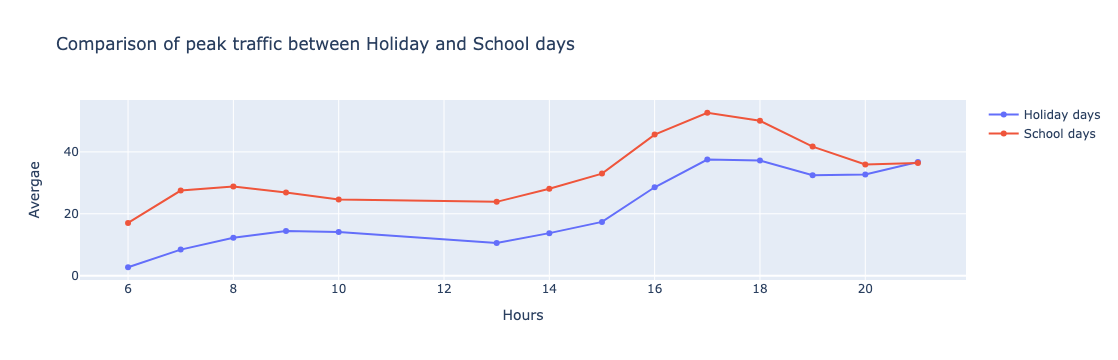

In [ ]:
fig = go.Figure()

# Add traces for each column
fig.add_trace(go.Scatter(x=hourly_average['holiday_hours'], y=hourly_average['Average_holiday_hours'], mode='lines+markers', name='Holiday days'))
fig.add_trace(go.Scatter(x=hourly_average['school_hours'], y=hourly_average['Average_school_hours'], mode='lines+markers', name='School days'))

# Update layout
fig.update_layout(title='Comparison of peak traffic between Holiday and School days',
                  xaxis_title='Hours',
                  yaxis_title='Avergae')

# Show the chart
fig.show()